In [263]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import pandas as pd
from tensorflow.keras.models import Model


In [264]:
mnist = tf.keras.datasets.mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()

x_train, x_test = x_train / 255.0, x_test / 255.0 

In [270]:
def create_model(name="relu",n=1):
    model = tf.keras.Sequential([ tf.keras.layers.Flatten(input_shape=(28, 28)) ])
    layers=[]
    for i in range(n) :
        model.add(tf.keras.layers.Dense(min(2 ** ((n - i + 8) // 2),28 ** 2), activation=name))
        layers.append(min(2 ** ((n - i + 6) // 2),28 ** 2))
    model.add(tf.keras.layers.Dense(10, activation="softmax"))
    return model, layers

def train_model(model, epoch = 1):
    model.compile(optimizer='RMSprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
    history = model.fit(x_train, y_train,batch_size=32, epochs=epoch ,use_multiprocessing=True, validation_data=(x_test,y_test))
    
    
    return np.mean(np.argmax(model.predict(x_test),axis=1) == y_test),history.history# model.evaluate(x_test, y_test)


def create_data_table(*argv) :
    data = []
    for ar in argv:
        for elem in ar:
            tmp = []
            for m in elem:
                tmp.append(round(m[1], 4))
            data.append(tmp)
    return data

In [ ]:
#creating models
m_relu = []
m_sigmoid = []
m_softmax = []
for i in range(1, 11):
    m_relu.append(create_model('relu',i))
    m_sigmoid.append(create_model('sigmoid',i))
    m_softmax.append(create_model('tanh',i))

#training
tr_relu = []
tr_sigmoid = []
tr_softmax = []
for i in range(10):
    tr_relu.append(train_model(m_relu[i][0], 30)[1])
    tr_sigmoid.append(train_model(m_sigmoid[i][0], 30)[1])
    tr_softmax.append(train_model(m_softmax[i][0], 30)[1])



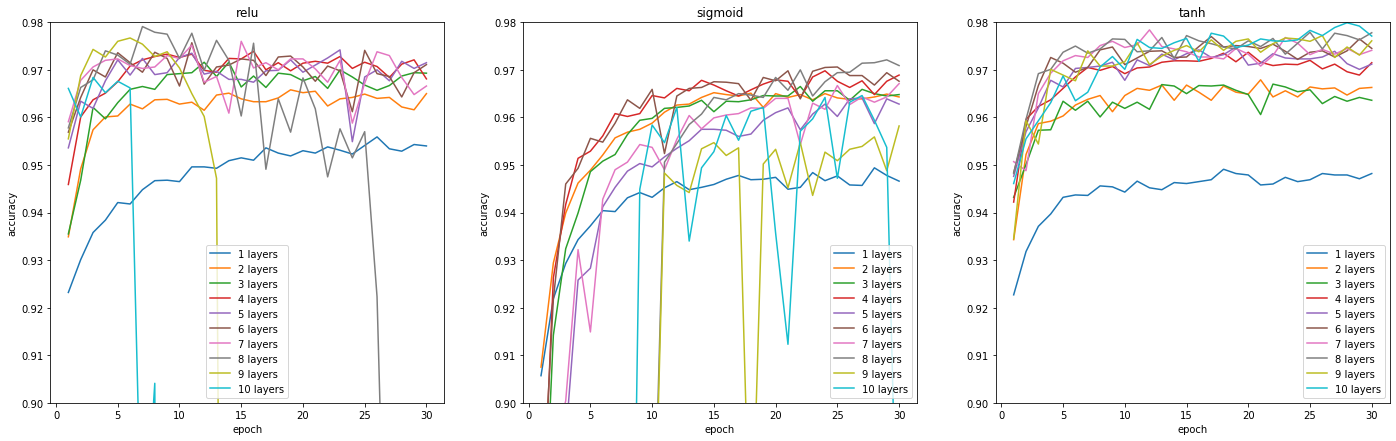

In [277]:
def first95(arr):
    for j in range(len(arr)):
        if arr[j]>0.95: return j+1
    return -1
        
data=[]
plt.figure(figsize=(24, 7))
for k in ((1,'relu',m_relu ,tr_relu),(2,'sigmoid',m_sigmoid ,tr_sigmoid),(3,'tanh',m_softmax ,tr_softmax)):
    plt.subplot(1, 3, k[0])
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.title(k[1])
    plt.ylim(0.9,0.98)
    for i in range(10):
        s=''
        for t in k[2][i][1]:
            s+=str(t)+" "
        data.append([k[1],s,max(k[3][i]["val_accuracy"]),first95(k[3][i]["val_accuracy"])])
        plt.plot(list(range(1, 31)), k[3][i]["val_accuracy"], label='{} layers'.format(i+1)) 
    plt.legend()


Almost always the more layers the faster model trains. But for models with relu та sigmoid activations, starting with 8 and 9 layers respectively, accuracy starts to decrease quickly. This is, most likely, just overfeed.

In [321]:
df = pd.DataFrame(data=data,columns=['actuivation','layers','max_accuracy','first_time_95%_ac'])
df=df.sort_values(by='first_time_95%_ac')
df

,actuivation,layers,max_accuracy,first_time_95%_ac
20,tanh,8,0.9491,-1
10,sigmoid,8,0.9494,-1
4,relu,32 32 16 16 8,0.9742,1
5,relu,64 32 32 16 16 8,0.9757,1
6,relu,64 64 32 32 16 16 8,0.9760,1
7,relu,128 64 64 32 32 16 16 8,0.9791,1
8,relu,128 128 64 64 32 32 16 16 8,0.9767,1
9,relu,256 128 128 64 64 32 32 16 16 8,0.9684,1
26,tanh,64 64 32 32 16 16 8,0.9784,1
29,tanh,256 128 128 64 64 32 32 16 16 8,0.9799,2


If take as speed of model convergence number of epochs to reach accuracy of 95%, then almost all models convergended in <14 epochs. Only two models that didn't convergended in < 14 epochs didnt convergended at all(in 30 epochs).

In [285]:
x=np.arange(1,31)

In [302]:
max_acc_relu=[]
for i in range(10):
    max_acc_relu.append([tr_relu[i]['val_accuracy'][0]])
    for j in tr_relu[i]['val_accuracy'][1:]:
        if max_acc_relu[i][-1]<j:
            max_acc_relu[i].append(j)
        else:
            max_acc_relu[i].append(max_acc_relu[i][-1])
max_acc_sigmoid=[]
for i in range(10):
    max_acc_sigmoid.append([tr_sigmoid[i]['val_accuracy'][0]])
    for j in tr_sigmoid[i]['val_accuracy'][1:]:
        if max_acc_sigmoid[i][-1]<j:
            max_acc_sigmoid[i].append(j)
        else:
            max_acc_sigmoid[i].append(max_acc_sigmoid[i][-1])
max_acc_tanh=[]
for i in range(10):
    max_acc_tanh.append([tr_softmax[i]['val_accuracy'][0]])
    for j in tr_softmax[i]['val_accuracy'][1:]:
        if max_acc_tanh[i][-1]<j:
            max_acc_tanh[i].append(j)
        else:
            max_acc_tanh[i].append(max_acc_tanh[i][-1])

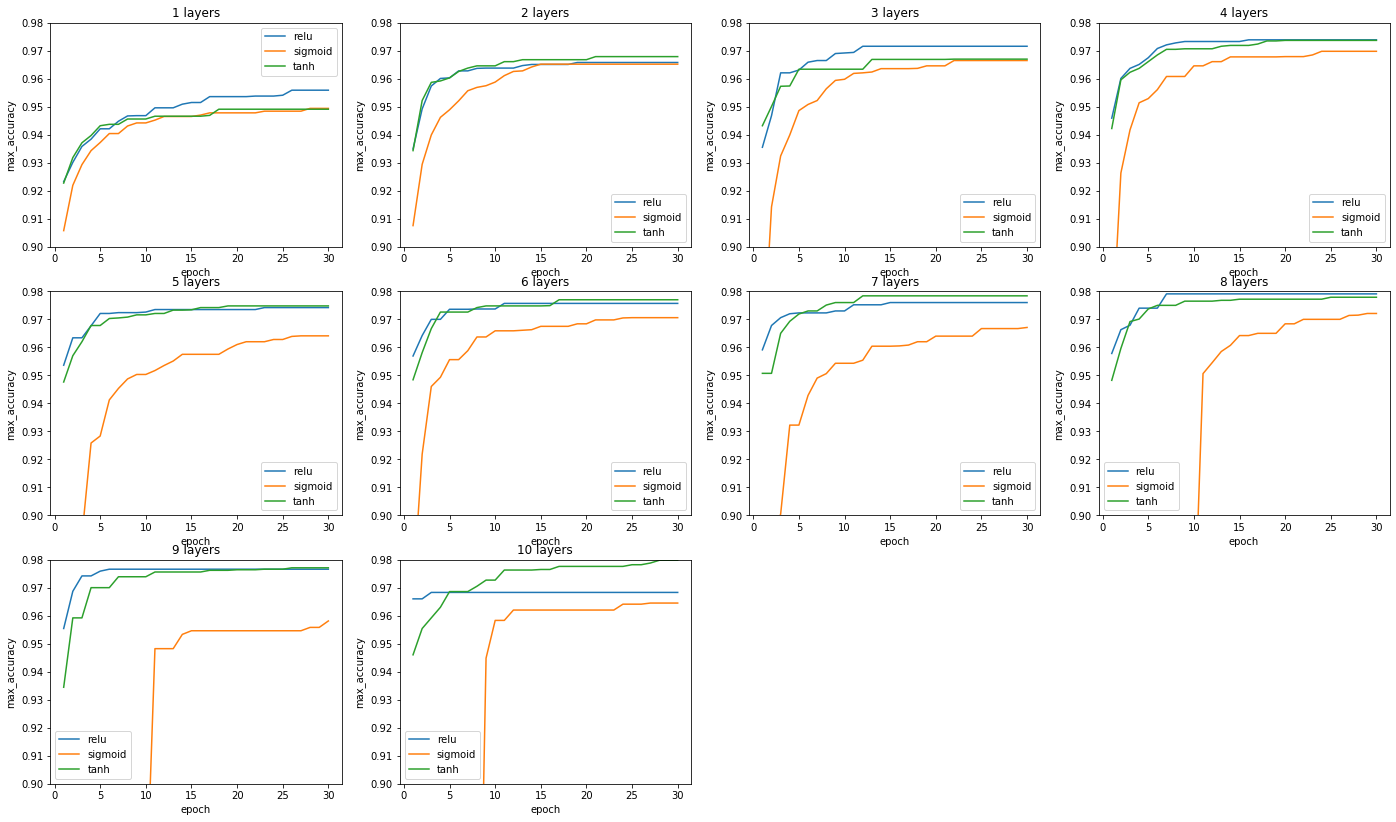

In [312]:
plt.figure(figsize=(24, 14))
for i in range(10):
    plt.subplot(3, 4, i+1)
    plt.ylabel('max_accuracy')
    plt.xlabel('epoch')
    plt.title('{} layers'.format(i+1))
    plt.plot(x, max_acc_relu[i], label='relu') 
    plt.plot(x, max_acc_sigmoid[i], label='sigmoid') 
    plt.plot(x, max_acc_tanh[i], label='tanh') 
    plt.ylim(0.9,0.98)
    plt.legend()

This graphs are graphs of speed of model convergence depending on on which accuracy we assume that model converged.

In [322]:
df=df.sort_values(by='max_accuracy',)
df

,actuivation,layers,max_accuracy,first_time_95%_ac
20,tanh,8,0.9491,-1
10,sigmoid,8,0.9494,-1
0,relu,8,0.9559,14
18,sigmoid,128 128 64 64 32 32 16 16 8,0.9582,14
14,sigmoid,32 32 16 16 8,0.9641,9
19,sigmoid,256 128 128 64 64 32 32 16 16 8,0.9646,10
11,sigmoid,16 8,0.9652,6
1,relu,16 8,0.9658,3
12,sigmoid,16 16 8,0.9665,6
22,tanh,16 16 8,0.9670,2


From this table we can see that the best activations for this task is tanh and relu (tanh is a little better). Sigmoid activations is obviously don't feet as well as others for this problem. The best model I managed to get is model with 10 layers and tanh activation: 98%.